# Titanic survived Project

# Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


# Attribute Information

Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number
Fare- Passenger Fare (British pound)
Cabin- Cabin
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



From reading the given problem statement we can say that this a binary classification machine learning project

In [62]:
#Importing necessary libraries for analysis:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [63]:
#Downloading the raw data and loading into dataframe with the help of pandas library:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv")

In [64]:
#For viewing the first 20 columns in given dataset
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#                                           1) EXPLORING DATASET

In [65]:
#To know about the no of rows and columns in the dataset
df.shape

(891, 12)

In [66]:
#To know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
#To know more about the categorical column and catogories count inside it:1
df["Sex"].unique()

array(['male', 'female'], dtype=object)

There are two categories in the sex column.

In [68]:
#Analysing the ticket column:2
df["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

There are so many categories in the ticket column.

In [69]:
#Analysing the cabin column:3
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In this column also has so many categories and missing values in the dataset. In the analysing part we will handle the missing values.

In [70]:
#Analysing the Pclass column:4
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

The Pclass column comes under categorical column since it has 3 unique values.

In [71]:
#Analysing the Parch column:5
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

There are six categories in the Parch column.

In [72]:
#Analysing the embarked column:6
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

There are three categories and this column has missing values in it.

In [73]:
#Analysing the embarked column:7
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

From this information we can see that there are 12 columns in the dataset.we will split the column into categorical and numerical column which help in futher analysis of the dataset.
The numerical columns are PassengerId,Age,Fare and the categorical columns are Name,Sex,Ticket,Embarked,Cabin,Survived,Pclass,Parch,SibSp.


From the above categorical most of them numerically categoried column,Only for the sex,Ticket,Embarked column we have to think about encoding process.

Till now we have gathered some of the basic information about the dataset we need to analyse more with help of statistical tools and visulaization tools.

# 2)ANALYSING THE DATASET 

1)Identifying the missing values:

In [74]:
#TO know about the missing values in the given dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are missing values in the dataset.The numerical column Age has missing values.The categorical column cabin and Embarked has also containing missing values in them.We have to handle the missing values.

Here our main aim to find the people survival so their names are not much important,Majority of the datapoints are missing in the Cabin column filling with mean value will not lead us to better clarity so deleting the Cabin column.
Name,Passenger id ,Ticket does not have any influence for survival for deleting those columns.

In [75]:
#deleting the columns:[Cabin,Name,Ticket,PassengerId]
df=df.drop(columns=["Cabin","Name","PassengerId","Ticket"],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


2)Handling the missing the values :

In [76]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

now we have missing values in the two columns for the age column since it is a numerical column we are filling the values with mean of total column and for the embarked column since it is a categorical column we will fill with mode value.

In [77]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [78]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [79]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Now dataset looks clean we can further analyse the dataset.

In [80]:
#to know more about the statistical description of the dataset
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From this we can observe that,
1)The dataset count is same for all the columns
2)The survived column is the independent feature.Pclass,SibSp,Parch are categorical columns.
3)From observing the age and fair both of the column has skewness.
4)75% and max values for fair is high there may be outliers we can say all the fair age cannot be in same range but leaving them can make our ml model learn different trends and pattern

In [81]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [82]:
#removing the skewness using the cuberoot method: for fare column
df["Fare"]=np.cbrt(df["Fare"])

In [83]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        1.230382
dtype: float64

# 3)DATASET VISUALIZATION

let analyse the survived column: since it is a categorical data 

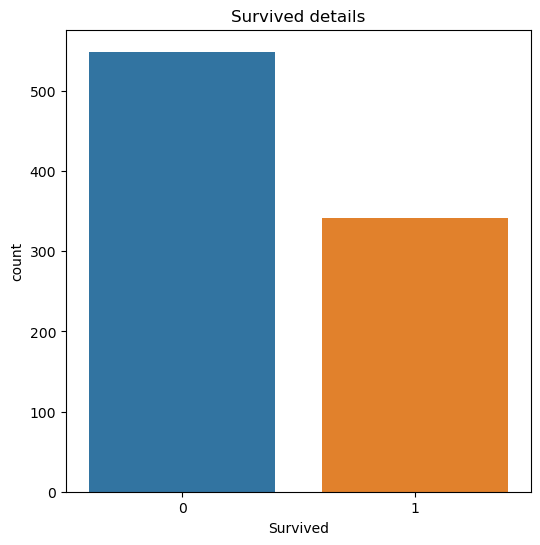

In [84]:
plt.figure(figsize=(6,6))
sns.countplot(x="Survived",data=df)
plt.title("Survived details")
plt.show()

In [85]:
#to see count numerically
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

From this 549 persons not survived and only 342 survived.

let's visualise other columns along with survived columns:

<Axes: xlabel='Sex', ylabel='count'>

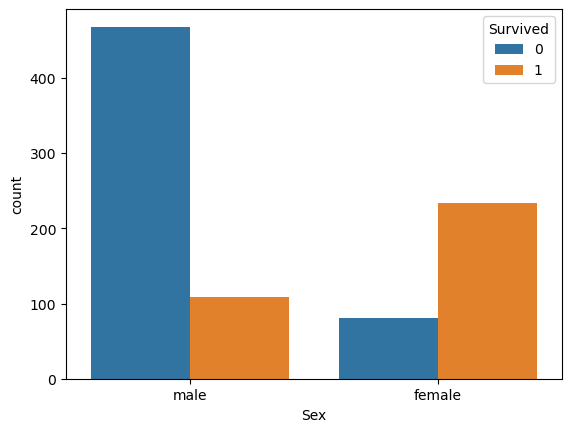

In [86]:
#1)with sex column:
sns.countplot(x="Sex",data=df,hue="Survived")

In [87]:
#to see count numerically
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

From this graph we can say that comparitive to male many females have survived

<Axes: xlabel='Pclass', ylabel='count'>

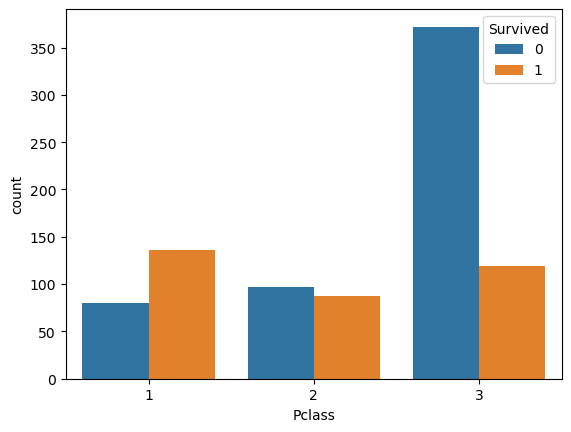

In [88]:
#2)with Pclass column:
sns.countplot(x="Pclass",data=df,hue="Survived")

from this graph we can say that from class 1 people have survived more.Many people not survived in class 3.

In [89]:
#to see count numerically
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

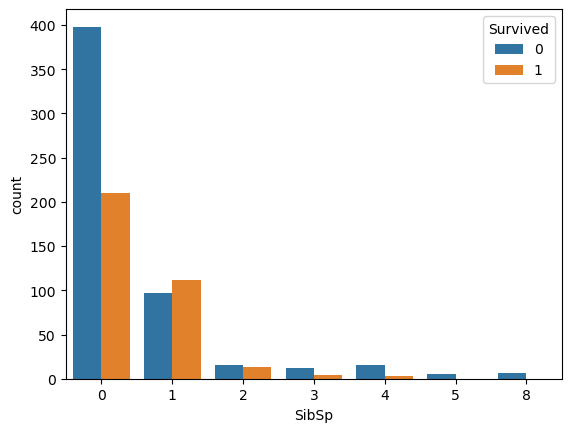

In [90]:
#3)with SibSp column: [S]
sns.countplot(x="SibSp",data=df,hue="Survived")

In [91]:
#to see count numerically
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: xlabel='Parch', ylabel='count'>

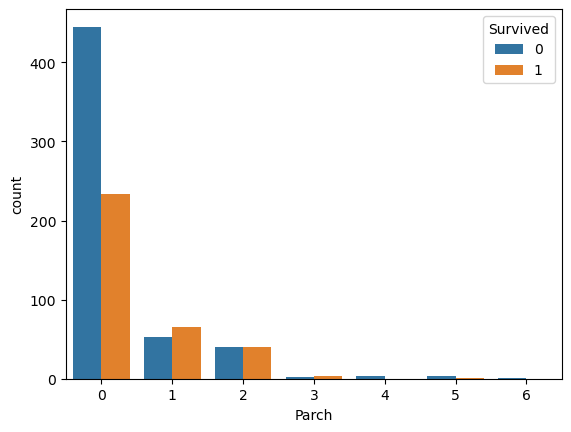

In [92]:
#4)with parch column:
sns.countplot(x="Parch",data=df,hue="Survived")

<Axes: xlabel='Embarked', ylabel='count'>

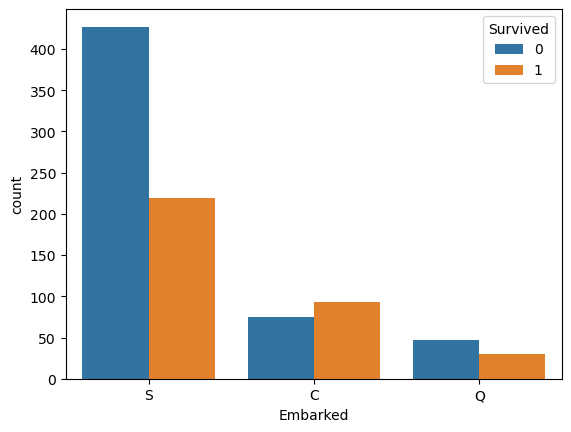

In [93]:
#5)with Embarked column:
sns.countplot(x="Embarked",data=df,hue="Survived")

From all these graphs we can say each category has difference in survival depending on the class,age,section,along with family sibling or not we will futher proceed the dataset.But these dependent feature has more influential with the dependent feature we have to consider these for prediction.

# 4)Encoding

In [94]:
#Encoding sex column
df.replace({
    "Sex":{"male":0,"female":1}},inplace=True)


In [95]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [96]:
df.replace({
    "Embarked":{"S":0,"C":1,"Q":2}},inplace=True)


In [97]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,1.935438,0
1,1,1,1,38.000000,1,0,4.146318,1
2,1,3,1,26.000000,0,0,1.993730,0
3,1,1,1,35.000000,1,0,3.758647,0
4,0,3,0,35.000000,0,0,2.004158,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,2.351335,0
887,1,1,1,19.000000,0,0,3.107233,0
888,0,3,1,29.699118,1,2,2.862294,0
889,1,1,0,26.000000,0,0,3.107233,1


now almost most of the text wise categorical columns into numerical columns.

# 5)Splitting The Dataset Into Feature and Target:

In [98]:
#Importing the neccessary libraries and model for further creation of the model:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [99]:
X=df.drop("Survived",axis=1)
Y=df[["Survived"]]

In [100]:
#To split the data into train and test split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

# 6)Creating model 1:Logistic Regression

In [101]:
#Model Instantiating and training:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [102]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=log_reg.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [103]:
#for training -Accuracy score
y_trpred=log_reg.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [104]:
#Displaying the accuracy percentage:
print("Training Score for logistic Regression Model is :",round(train_Accuracy*100,2))
print("Testing  Score for logistic Regression Model is :",round(test_Accuracy*100,2))

Training Score for logistic Regression Model is : 80.62
Testing  Score for logistic Regression Model is : 78.21


# 6)Creating model 2:RandomForestClassifier

In [105]:
#Model Instantiating and training:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [106]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=RFC.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [107]:
#for training -Accuracy score
y_trpred=RFC.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [108]:
#Displaying the accuracy percentage:
print("Training Score for Random Forest Classifer Model is :",round(train_Accuracy*100,2))
print("Testing  Score for Random Forest Classifier Model is :",round(test_Accuracy*100,2))

Training Score for Random Forest Classifer Model is : 98.6
Testing  Score for Random Forest Classifier Model is : 79.89


# 6)Creating model 3:Support Vector Machine

In [109]:
from sklearn.svm import SVC

In [110]:
#Model Instantiating and training:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

In [111]:
svm.fit(x_train,y_train)

SVC(gamma=0.5)

In [112]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=svm.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [113]:
#for training -Accuracy score
y_trpred=svm.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [114]:
#Displaying the accuracy percentage:
print("Training Score for Support Vector Machine Model is :",round(train_Accuracy*100,2))
print("Testing  Score for Support Vector Machine Model Model is :",round(test_Accuracy*100,2))

Training Score for Support Vector Machine Model is : 92.42
Testing  Score for Support Vector Machine Model Model is : 72.63


# Creating model 4:AdaBoostClassifier

In [115]:
#Model Instantiating and training:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [116]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=ada.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [117]:
#for training -Accuracy score
y_trpred=ada.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [118]:
#Displaying the accuracy percentage:
print("Training Score for AdaBoostClassifier Model is :",round(train_Accuracy*100,2))
print("Testing  Score for AdaBoostClassifier Model is :",round(test_Accuracy*100,2))

Training Score for AdaBoostClassifier Model is : 84.83
Testing  Score for AdaBoostClassifier Model is : 75.42


# Creating model 5:GradientBoostingClassifier

In [119]:
#Model Instantiating and training:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [120]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=gbc.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [121]:
#for training -Accuracy score
y_trpred=gbc.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [122]:
#Displaying the accuracy percentage:
print("Training Score for Gradient Boosting Classifier Model is:",round(train_Accuracy*100,2))
print("Testing  Score for Gradient Boosting Classifier Model is:",round(test_Accuracy*100,2))

Training Score for Gradient Boosting Classifier Model is: 91.29
Testing  Score for Gradient Boosting Classifier Model is: 79.33


# 6)Hyper parameter Turing:

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
grid = {"C": np.logspace(-3, 3, 20), "penalty": ["l2"]}# range of values randomly given 
logreg = LogisticRegression()
grid_logreg = GridSearchCV(logreg, grid, cv=10)
grid_logreg.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'penalty': ['l2']})

In [128]:
best_params = grid_logreg.best_params_
best_accuracy = grid_logreg.best_score_ * 100
print("Tuned hyperparameters (best parameters):", best_params)
print("Accuracy:", best_accuracy)

Tuned hyperparameters (best parameters): {'C': 0.3359818286283781, 'penalty': 'l2'}
Accuracy: 81.17175273865416


In [131]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,1.935438,0
1,1,1,38.000000,1,0,4.146318,1
2,3,1,26.000000,0,0,1.993730,0
3,1,1,35.000000,1,0,3.758647,0
4,3,0,35.000000,0,0,2.004158,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,2.351335,0
887,1,1,19.000000,0,0,3.107233,0
888,3,1,29.699118,1,2,2.862294,0
889,1,0,26.000000,0,0,3.107233,1


# 7)Building a predictive Model:

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
raw_data=2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
output =survived:1
"Cabin","Name","PassengerId","Ticket": These columns are deleted
female=1,male=0
s=0,c=1,q=2: embarked

In [132]:
data=1,1,38,1,0,71.2833,1
array=np.asarray(data)

In [133]:
final=array.reshape(1,-1)#reshaping the numpy array
prediction=log_reg.predict(final)

In [134]:
prediction#model predicted

array([1], dtype=int64)

In [ ]:
output =survived:1#Actual output

In [ ]:
#End of the project